### Εισαγωγή Δεδομένων

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
res = pd.read_csv("time/times.csv")

In [3]:
res.head()

,execTime,Q1total,Q1postRead,Q2total,Q2postRead,Q3APItotal,Q3APIpostRead,Q3RDDtotal,Q3RDDpostRead,Q4total,Q4postRead,Q5total,Q5postRead
0,2022-12-08 23:19:35.504499,16.350007,10.721878,13.770449,9.345640,14.517415,10.326361,53.328487,53.281039,17.977190,13.500536,21.796009,17.474636
1,2022-12-08 23:34:35.604729,13.550601,7.177397,13.327908,8.832568,14.350674,9.929752,52.686143,52.668489,16.723074,12.154002,20.846561,16.598338
2,2022-12-08 23:49:35.700254,14.166466,7.194119,12.562709,8.226596,12.741637,8.422755,51.233314,51.211826,15.806661,11.435774,20.822611,16.401235
3,2022-12-09 00:04:35.733270,13.391708,8.832743,12.593018,8.266487,13.935338,9.626198,52.346927,52.331663,16.614574,12.052028,21.075257,16.714239
4,2022-12-09 00:19:35.744599,13.407460,8.643774,12.480348,8.144162,14.139189,9.719398,53.668654,53.651742,16.282962,12.055028,20.263723,15.895863


### Υπολογισμός χρόνων εκτέλεσης με χρήση 2 worker:

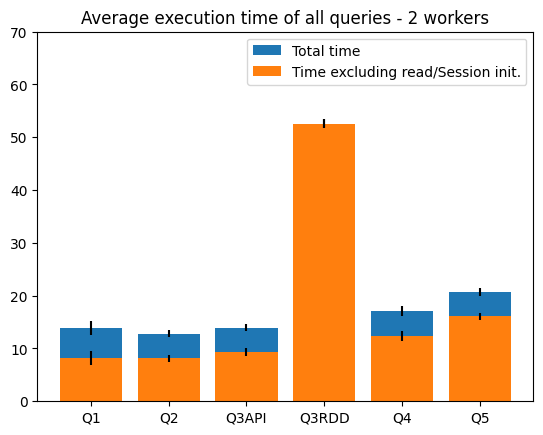

In [4]:
ress=res.drop(["execTime","Q1postRead","Q2postRead",'Q3APIpostRead',
    'Q3RDDpostRead',"Q4postRead","Q5postRead"],axis=1)
meant = ress.mean()
stdt = ress.std()
ress=res.drop(["execTime","Q1total","Q2total",'Q3APItotal',
    'Q3RDDtotal',"Q4total","Q5total"],axis=1)
meanar = ress.mean()
stdar = ress.std()
labels = ["Q1","Q2","Q3API","Q3RDD","Q4","Q5",]
plt.bar(labels,meant,yerr=stdt,label="Total time")
plt.bar(labels,meanar,yerr=stdar,label="Time excluding read/Session init.")
plt.title("Average execution time of all queries - 2 workers")
plt.ylim(0,70)
plt.legend()

In [5]:
meant.head(6)

Q1total       13.918206
Q2total       12.803554
Q3APItotal    13.960145
Q3RDDtotal    52.598739
Q4total       17.025122
Q5total       20.674751
dtype: float64

In [6]:
meanar.head(6)

Q1postRead        8.222063
Q2postRead        8.195327
Q3APIpostRead     9.369321
Q3RDDpostRead    52.580736
Q4postRead       12.387458
Q5postRead       16.066590
dtype: float64

In [7]:
import datetime
hours = res.execTime.apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S.%f").hour)
days = res.execTime.apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S.%f").weekday())
res["hours"]=hours
res["days"]=days

In [8]:
byhour=res.drop(["execTime","days"],axis=1).groupby(res.hours).aggregate("mean")
byhour2=res.drop(["execTime","days"],axis=1).groupby(res.hours).aggregate("std")
byweekday = res.drop(["execTime","hours"],axis=1).groupby(res.days).aggregate("mean")
byweekday2 = res.drop(["execTime","hours"],axis=1).groupby(res.days).aggregate("std")


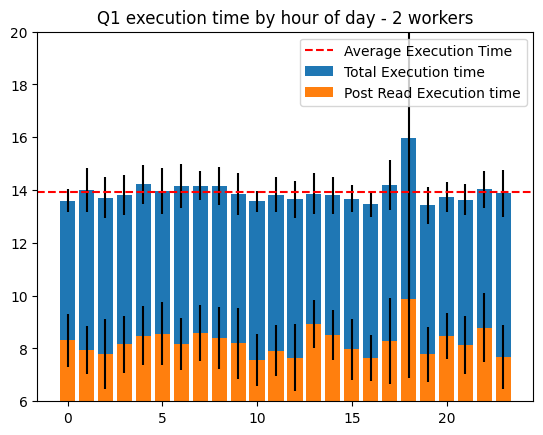

In [9]:
plt.bar(byhour.index,byhour.Q1total,yerr=byhour2.Q1total,label="Total Execution time")
plt.bar(byhour.index,byhour.Q1postRead,yerr=byhour2.Q1postRead,label="Post Read Execution time")
plt.axhline(y=byhour.Q1total.mean(),label="Average Execution Time",linestyle="dashed",color="red")
plt.ylim(6,20)
plt.title("Q1 execution time by hour of day - 2 workers")
plt.legend()

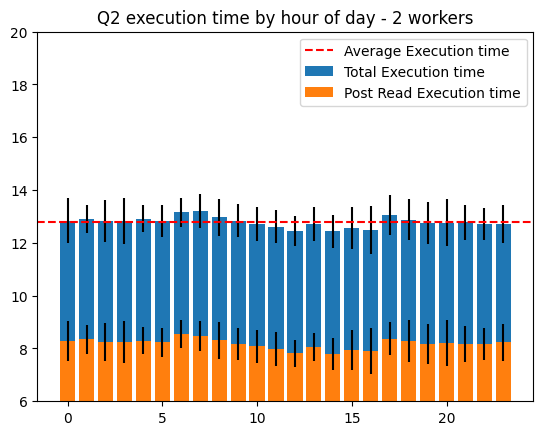

In [10]:
plt.bar(byhour.index,byhour.Q2total,yerr=byhour2.Q2total,label="Total Execution time")
plt.bar(byhour.index,byhour.Q2postRead,yerr=byhour2.Q2postRead,label="Post Read Execution time")
plt.axhline(y=byhour.Q2total.mean(),label="Average Execution time",linestyle="dashed",color="red")
plt.ylim(6,20)
plt.title("Q2 execution time by hour of day - 2 workers")
plt.legend()

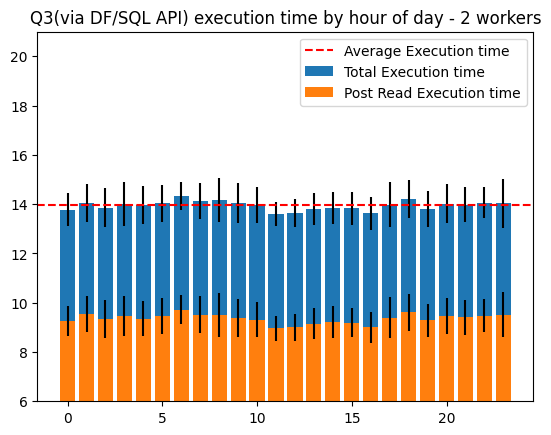

In [11]:
plt.bar(byhour.index,byhour.Q3APItotal,yerr=byhour2.Q3APItotal,label="Total Execution time")
plt.bar(byhour.index,byhour.Q3APIpostRead,yerr=byhour2.Q3APIpostRead,label="Post Read Execution time")
plt.axhline(y=byhour.Q3APItotal.mean(),label="Average Execution time",linestyle="dashed",color="red")
plt.ylim(6,21)
plt.title("Q3(via DF/SQL API) execution time by hour of day - 2 workers")
plt.legend()

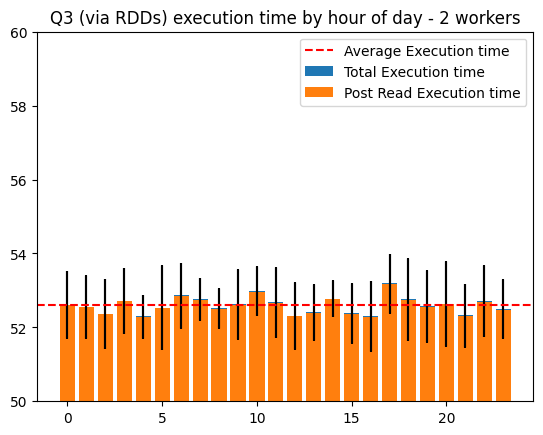

In [12]:
plt.bar(byhour.index,byhour.Q3RDDtotal,yerr=byhour2.Q3RDDtotal,label="Total Execution time")
plt.bar(byhour.index,byhour.Q3RDDpostRead,yerr=byhour2.Q3RDDpostRead,label="Post Read Execution time")
plt.axhline(y=byhour.Q3RDDtotal.mean(),label="Average Execution time",linestyle="dashed",color="red")
plt.ylim(50,60)
plt.title("Q3 (via RDDs) execution time by hour of day - 2 workers")
plt.legend()

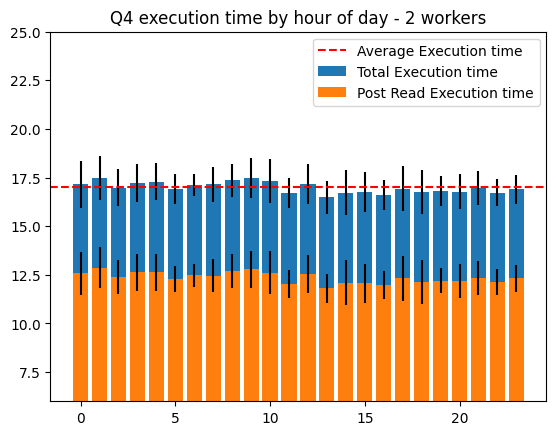

In [13]:
plt.bar(byhour.index,byhour.Q4total,yerr=byhour2.Q4total,label="Total Execution time")
plt.bar(byhour.index,byhour.Q4postRead,yerr=byhour2.Q4postRead,label="Post Read Execution time")
plt.axhline(y=byhour.Q4total.mean(),label="Average Execution time",linestyle="dashed",color="red")
plt.ylim(6,25)
plt.title("Q4 execution time by hour of day - 2 workers")
plt.legend()

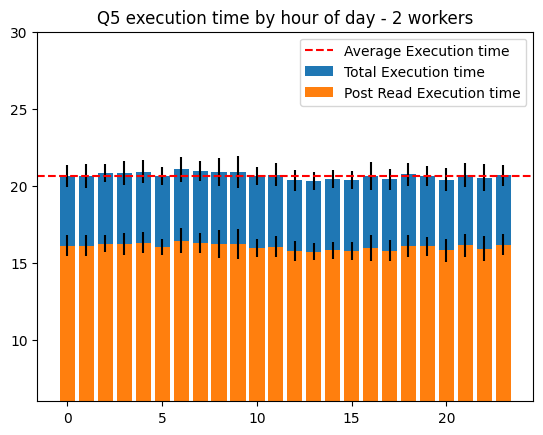

In [14]:
plt.bar(byhour.index,byhour.Q5total,yerr=byhour2.Q5total,label="Total Execution time")
plt.bar(byhour.index,byhour.Q5postRead,yerr=byhour2.Q5postRead,label="Post Read Execution time")
plt.axhline(y=byhour.Q5total.mean(),label="Average Execution time",linestyle="dashed",color="red")
plt.ylim(6,30)
plt.title("Q5 execution time by hour of day - 2 workers")
plt.legend()

In [15]:
res = pd.read_csv("time/times1w.csv")

In [16]:
res.head()

,execTime,Q1total,Q1postRead,Q2total,Q2postRead,Q3APItotal,Q3APIpostRead,Q3RDDtotal,Q3RDDpostRead,Q4total,Q4postRead,Q5total,Q5postRead
0,2022-12-10 11:58:16.293256,16.776680,10.809274,12.816417,8.215119,13.841261,9.356787,91.940459,91.722172,18.403939,13.917291,28.423004,24.084571
1,2022-12-10 12:13:16.334444,12.799248,8.069208,12.033919,7.481531,13.679267,9.338142,91.548814,91.530895,17.831248,13.320548,26.968188,22.438365
2,2022-12-10 12:28:16.415005,12.641026,8.033001,11.692669,7.172317,13.968486,9.328940,90.446257,90.431038,16.918269,12.324075,26.642830,22.122473
3,2022-12-10 12:43:16.473937,12.763496,8.157811,11.833829,7.534755,13.877635,9.321593,89.712060,89.693628,16.625744,11.992362,26.869609,22.475923
4,2022-12-10 12:58:16.533362,12.641320,7.920048,11.674650,7.107388,13.228626,8.964116,90.199194,90.184150,16.376383,11.964252,26.790512,22.251797


### Υπολογισμός χρόνων εκτέλεσης με χρήση 1 worker:

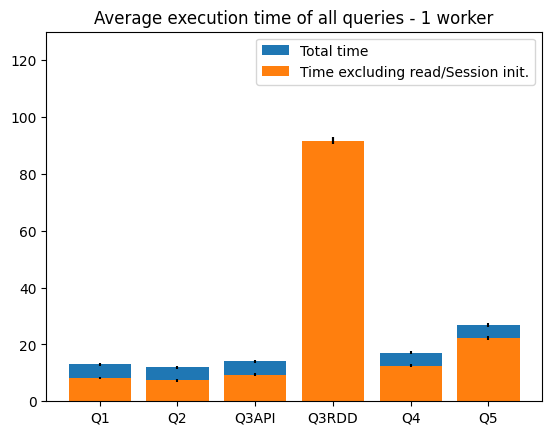

In [17]:
ress=res.drop(["execTime","Q1postRead","Q2postRead",'Q3APIpostRead',
    'Q3RDDpostRead',"Q4postRead","Q5postRead"],axis=1)
meant = ress.mean()
stdt = ress.std()
ress=res.drop(["execTime","Q1total","Q2total",'Q3APItotal',
    'Q3RDDtotal',"Q4total","Q5total"],axis=1)
meanar = ress.mean()
stdar = ress.std()
labels = ["Q1","Q2","Q3API","Q3RDD","Q4","Q5",]
plt.bar(labels,meant,yerr=stdt,label="Total time")
plt.bar(labels,meanar,yerr=stdar,label="Time excluding read/Session init.")
plt.title("Average execution time of all queries - 1 worker")
plt.ylim(0,130)
plt.legend()

In [18]:
meant.head(6)

Q1total       12.953791
Q2total       11.972118
Q3APItotal    14.051995
Q3RDDtotal    91.710620
Q4total       17.133297
Q5total       26.818183
dtype: float64

In [19]:
meanar.head(6)

Q1postRead        8.094795
Q2postRead        7.331796
Q3APIpostRead     9.413255
Q3RDDpostRead    91.693475
Q4postRead       12.452386
Q5postRead       22.176526
dtype: float64

In [20]:
import datetime
hours = res.execTime.apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S.%f").hour)
days = res.execTime.apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S.%f").weekday())
res["hours"]=hours
res["days"]=days

In [21]:
byhour=res.drop(["execTime","days"],axis=1).groupby(res.hours).aggregate("mean")
byhour2=res.drop(["execTime","days"],axis=1).groupby(res.hours).aggregate("std")
byweekday = res.drop(["execTime","hours"],axis=1).groupby(res.days).aggregate("mean")
byweekday2 = res.drop(["execTime","hours"],axis=1).groupby(res.days).aggregate("std")


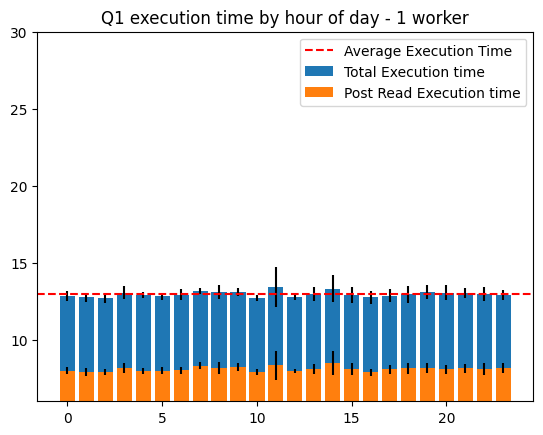

In [22]:
plt.bar(byhour.index,byhour.Q1total,yerr=byhour2.Q1total,label="Total Execution time")
plt.bar(byhour.index,byhour.Q1postRead,yerr=byhour2.Q1postRead,label="Post Read Execution time")
plt.axhline(y=byhour.Q1total.mean(),label="Average Execution Time",linestyle="dashed",color="red")
plt.ylim(6,30)
plt.title("Q1 execution time by hour of day - 1 worker")
plt.legend()

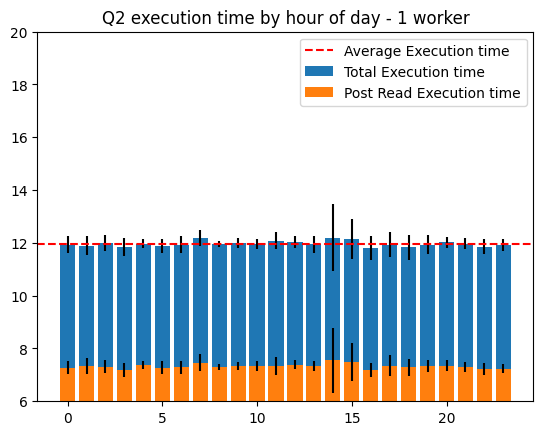

In [23]:
plt.bar(byhour.index,byhour.Q2total,yerr=byhour2.Q2total,label="Total Execution time")
plt.bar(byhour.index,byhour.Q2postRead,yerr=byhour2.Q2postRead,label="Post Read Execution time")
plt.axhline(y=byhour.Q2total.mean(),label="Average Execution time",linestyle="dashed",color="red")
plt.ylim(6,20)
plt.title("Q2 execution time by hour of day - 1 worker")
plt.legend()

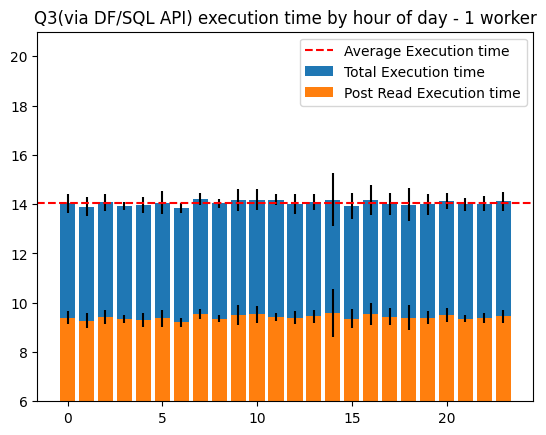

In [24]:
plt.bar(byhour.index,byhour.Q3APItotal,yerr=byhour2.Q3APItotal,label="Total Execution time")
plt.bar(byhour.index,byhour.Q3APIpostRead,yerr=byhour2.Q3APIpostRead,label="Post Read Execution time")
plt.axhline(y=byhour.Q3APItotal.mean(),label="Average Execution time",linestyle="dashed",color="red")
plt.ylim(6,21)
plt.title("Q3(via DF/SQL API) execution time by hour of day - 1 worker")
plt.legend()

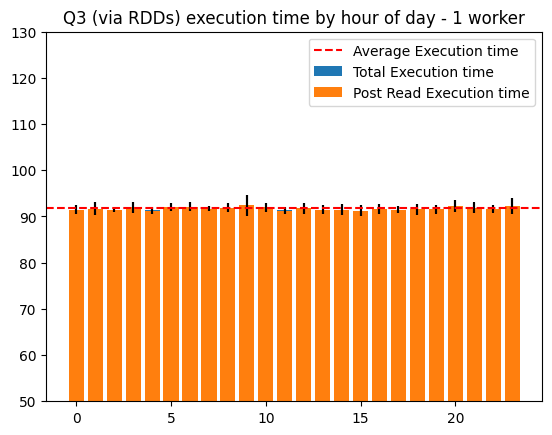

In [25]:
plt.bar(byhour.index,byhour.Q3RDDtotal,yerr=byhour2.Q3RDDtotal,label="Total Execution time")
plt.bar(byhour.index,byhour.Q3RDDpostRead,yerr=byhour2.Q3RDDpostRead,label="Post Read Execution time")
plt.axhline(y=byhour.Q3RDDtotal.mean(),label="Average Execution time",linestyle="dashed",color="red")
plt.ylim(50,130)
plt.title("Q3 (via RDDs) execution time by hour of day - 1 worker")
plt.legend()

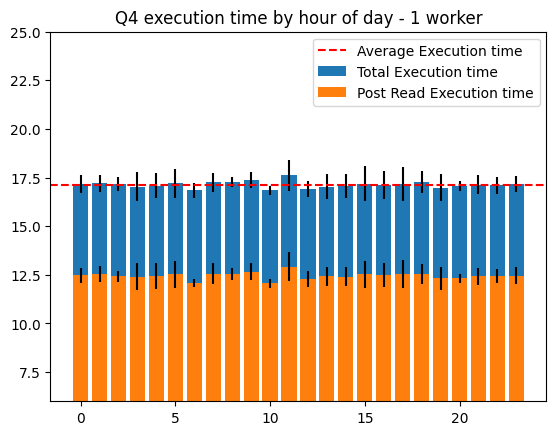

In [26]:
plt.bar(byhour.index,byhour.Q4total,yerr=byhour2.Q4total,label="Total Execution time")
plt.bar(byhour.index,byhour.Q4postRead,yerr=byhour2.Q4postRead,label="Post Read Execution time")
plt.axhline(y=byhour.Q4total.mean(),label="Average Execution time",linestyle="dashed",color="red")
plt.ylim(6,25)
plt.title("Q4 execution time by hour of day - 1 worker")
plt.legend()

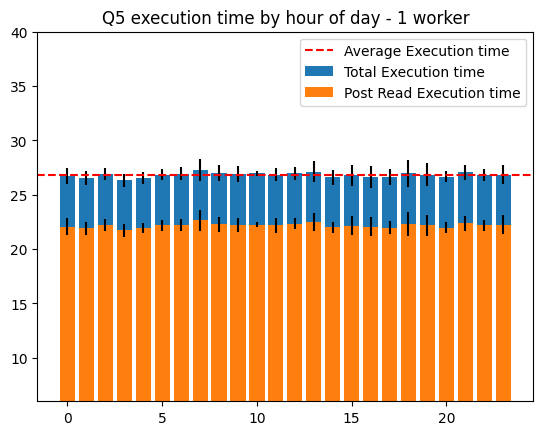

In [27]:
plt.bar(byhour.index,byhour.Q5total,yerr=byhour2.Q5total,label="Total Execution time")
plt.bar(byhour.index,byhour.Q5postRead,yerr=byhour2.Q5postRead,label="Post Read Execution time")
plt.axhline(y=byhour.Q5total.mean(),label="Average Execution time",linestyle="dashed",color="red")
plt.ylim(6,40)
plt.title("Q5 execution time by hour of day - 1 worker")
plt.legend()